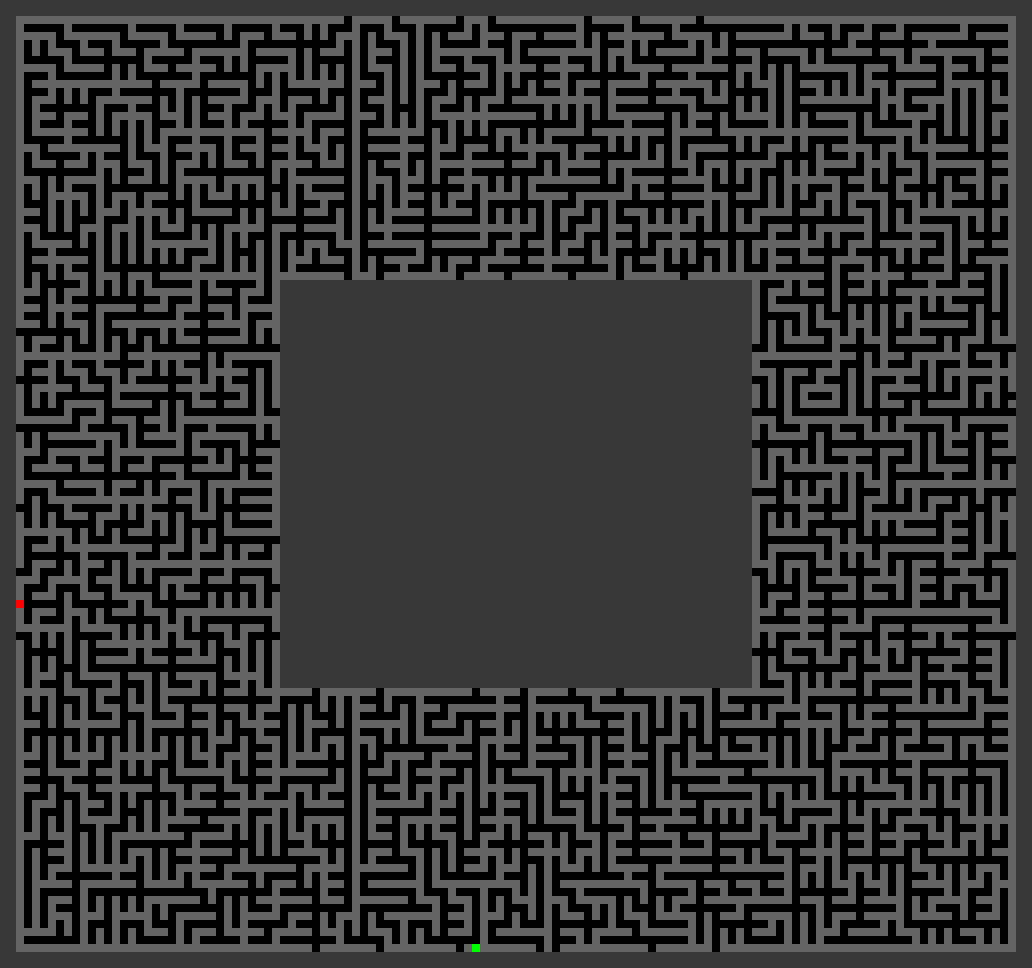

part1: 895 0


In [1]:
from PIL import Image
from IPython import display
import numpy as np
import cv2
import random




def ld():
    #map
    m={}
    
    for y,l in enumerate(open("20.txt").read().split('\n')):
        #if y in range(40,50):
        #    print(l[:20])
        for x,v in enumerate(l):
            p=(x,y)
            #print(v)
            if v=='.' or v=='#' or v.isalpha():
                pass
                m[p]=v
                #print(v)
                
    ww=max([x[0] for x in m.keys()])+1
    hh=max([x[1] for x in m.keys()])+1
    
    #print(w,h)
    
    #connections
    j={} 
    #warps
    w={}
    #blockers
    b={}
    for k1 in m.keys():
        x,y=k1
        if m[k1]=='.':
            if not k1 in j:
                j[k1]=[]
        if m[k1]=='#':
            b[k1]='#'
        for dx,dy in [(1,0),(0,1),(-1,0),(0,-1)]:
            k2=(x+dx*1,y+dy*1)
            k3=(x+dx*2,y+dy*2)
            if k2 in m:
                if m[k1]=='.' and m[k2]=='.':
                    j[k1].append(k2)
                else:
                    #print("b",m[k2])
                    if k3 in m and m[k3]!='.':
                            
                        kk=[m[k2],m[k3]]
                        kk.sort()
                        kk="".join(kk)
                        if not kk in w:
                            w[kk]=[]
                        w[kk].append(k1)
        
    for k in w.keys():
        if len(w[k])==2:
            A,B=w[k]
            j[A].append(B)
            j[B].append(A)
        #print(k,w[k])
        
    
    A=(0,0)
    A=w['AA'][0]
    B=(1,1)
    B=w['ZZ'][0]
    return j,b,ww,hh,A,B
            
def pretty(j,b,w,h,A,B):
    i=np.ones([h,w,3],dtype=np.uint8)*55
    for x,y in j.keys():
        i[y,x,:]=[0,0,0]
    for x,y in b.keys():
        i[y,x,:]=[100,100,100]
    #print(w,h)
    #print(a,b)
    i[A[1],A[0],:]=[0,255,0]
    i[B[1],B[0],:]=[255,0,0]
    
    F=8
    i = cv2.resize(i, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    display.clear_output(wait=True)
    display.display(Image.fromarray(i))

    


def p1():
    j,b,w,h,A,B=ld()
    
    e=[(A,0)]
    past={}
    
    while len(e):
        p,c=e[0]
        e=e[1:]
        
        pretty(j,b,w,h,A,B)
        
        if p==B:
            return c
        
        past[p]=1
        
        for p2 in j[p]:
            if not p2 in past:
                e.append((p2,c+1))
        
    
    
    
    
    
print("part1:",p1(),0)